# GeoBench EverWatch

In [7]:
import os
from pathlib import Path

import torch

from geobench_v2.datamodules import GeoBenchPASTISPanopticDataModule
from geobench_v2.datasets import GeoBenchPASTIS
from geobench_v2.datasets.normalization import SatMAENormalizer, ZScoreNormalizer
from geobench_v2.datasets.visualization_util import (
    compare_normalization_methods,
    compute_batch_histograms,
    plot_batch_histograms,
    plot_channel_histograms,
)
import geobench_v2
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PROJECT_ROOT = Path("../../")

STATS_SATMAE_PATH = os.path.join(
    PROJECT_ROOT, "geobench_v2", "datamodules", "dataset_stats_satmae", "pastis", "pastis_stats.json"
)
STATS_CLIP_RESCALE_PATH = os.path.join(
    PROJECT_ROOT, "geobench_v2", "datamodules", "dataset_stats_clip_rescale", "pastis", "pastis_stats.json"
)


In [25]:
band_order = GeoBenchPASTIS.band_default_order

datamodule = GeoBenchPASTISPanopticDataModule(
    root='/opt/app-root/src/fm-geospatial/data/PASTIS/',
    img_size = 224, 
    band_order=band_order, 
    num_time_steps=10, 
    # return_stacked_image=True, 
    label_type='instance_seg', 
    # collate_fn=geobench_v2.datamodules.pastis.pastis_collate_fn, 
    temporal_output_format = "CTHW",
    data_normalizer=torch.nn.Identity()
)
datamodule.setup("fit")

Using provided pre-initialized normalizer instance: Identity
Using provided pre-initialized normalizer instance: Identity


## Dataset Statistics

Computed over the training dataset.

### Image Statistics

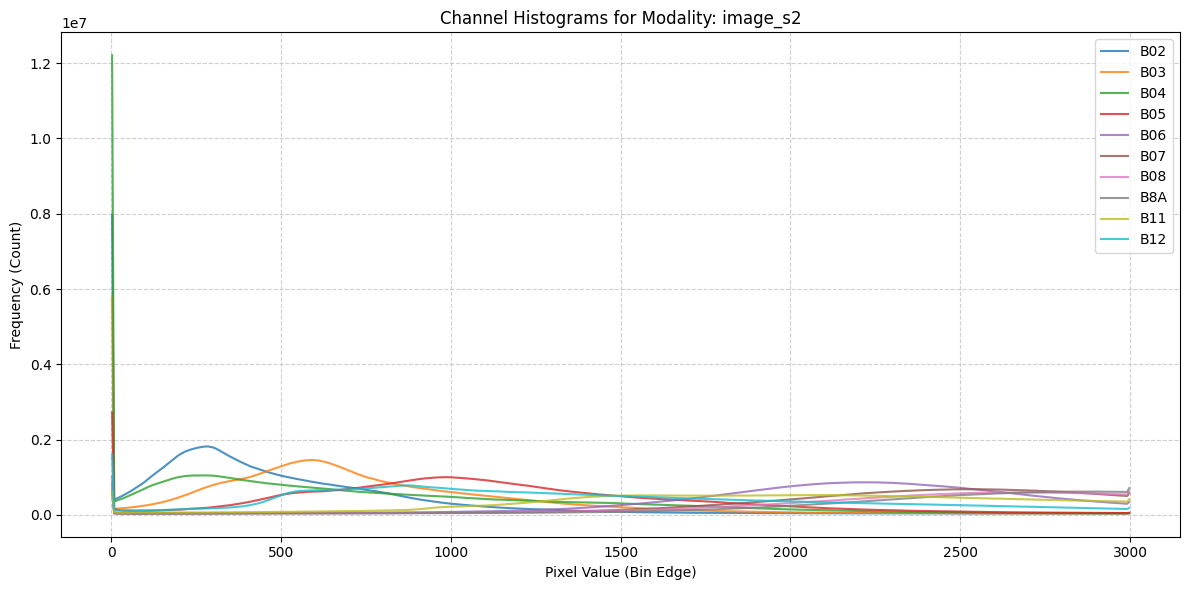

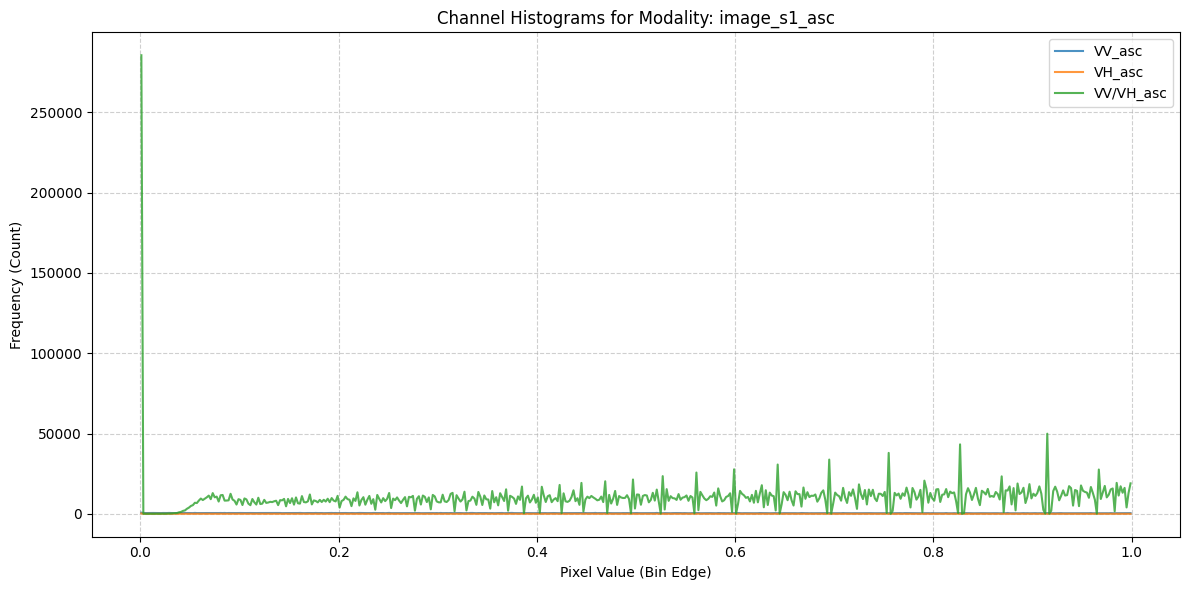

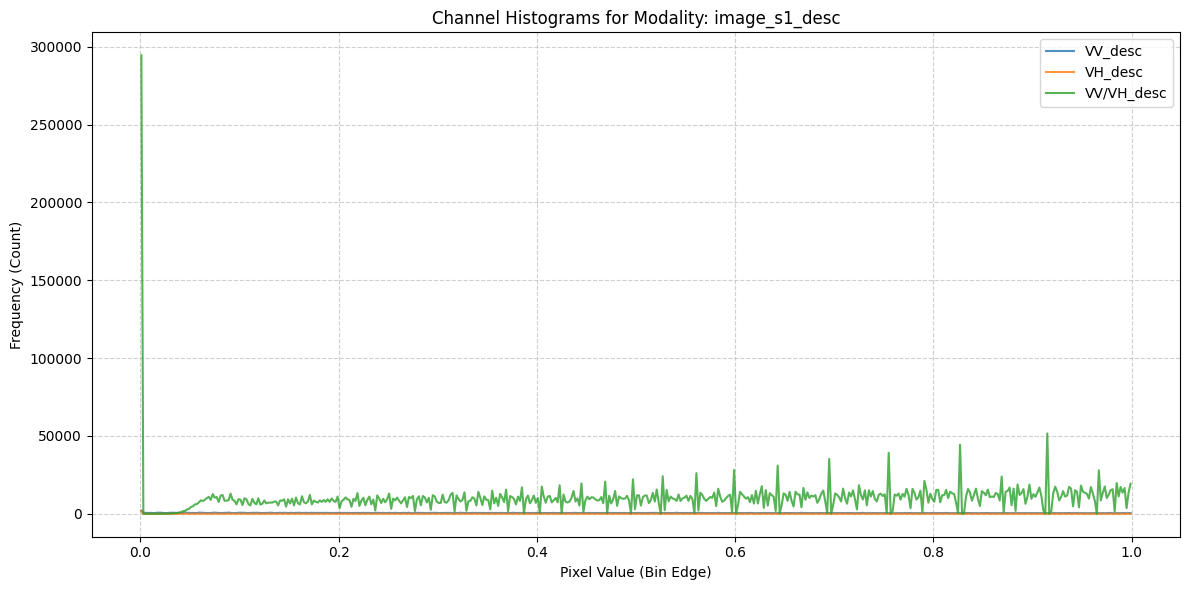

In [22]:
fig = plot_channel_histograms(
    STATS_SATMAE_PATH
)

### Raw Batch Statistics

In [23]:
# Get a batch of data from the dataloader
train_dataloader = datamodule.train_dataloader()
raw_batch = next(iter(train_dataloader))

raw_batch_stats = compute_batch_histograms(raw_batch, n_bins=100)


raw_figs = plot_batch_histograms(
    raw_batch_stats, band_order, title_suffix=" (Raw Data)"
)
raw_figs

RuntimeError: stack expects each tensor to be equal size, but got [73, 224, 224] at entry 0 and [53, 224, 224] at entry 1

### Effect of different Normalization Schemes

In [ ]:
zscore_normalizer = ZScoreNormalizer(STATS_CLIP_RESCALE_PATH, band_order)
satmae_normalizer = SatMAENormalizer(STATS_SATMAE_PATH, band_order)

In [ ]:
norm_fig, normalized_batches = compare_normalization_methods(
    raw_batch,
    [zscore_normalizer, satmae_normalizer],
    datamodule,
)

## Visualize Batch Data

In [ ]:
datamodule.data_normalizer = zscore_normalizer

In [26]:
fig, batch = datamodule.visualize_batch()

RuntimeError: The expanded size of the tensor (3) must match the existing size (10) at non-singleton dimension 0.  Target sizes: [3, -1, -1].  Tensor sizes: [10, 3, 3]